From the previous notebook 'Exploratory_Dat_Analysis', we analysis features, missing values, visualize all feature and their data distribution. We also saw the statistical summaries, and correlation among features. What we conclude that there are some features who are correlated each other which brings redundancy to the data. So we need something to select best features, and do some feature extraction. After this we will able to get a better model.

In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [147]:
# lets import necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# load the data
data = pd.read_csv('../input/data.csv')
# shape of our data set
print("Our datasets has ", data.shape[0],"x", data.shape[1], " dimensions")
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Our datasets has  569 x 33  dimensions
Number of rows:  569
Number of columns:  33


In [149]:
# select columns with any NaN value in it
missing_data = data.loc[:, data.isnull().all()]
print("Columns with missing values:", list(missing_data.columns))

Columns with missing values: ['Unnamed: 32']


In [150]:
# Now let's make our dataset separate with label and features
target = data['diagnosis']
list_to_drop = ['diagnosis', 'id', 'Unnamed: 32']
features = data.drop(list_to_drop, axis=1)
pd.set_option('max_column', None) # to see all columns
# Now let's see how our feature and target looks like
print(features.head())
print(target.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                

## Normalization

In [151]:
from sklearn.preprocessing import StandardScaler

# let's normalize our features to be on a same scale
scaler = StandardScaler()
features_std = scaler.fit_transform(features)


## Principal Component Analysis

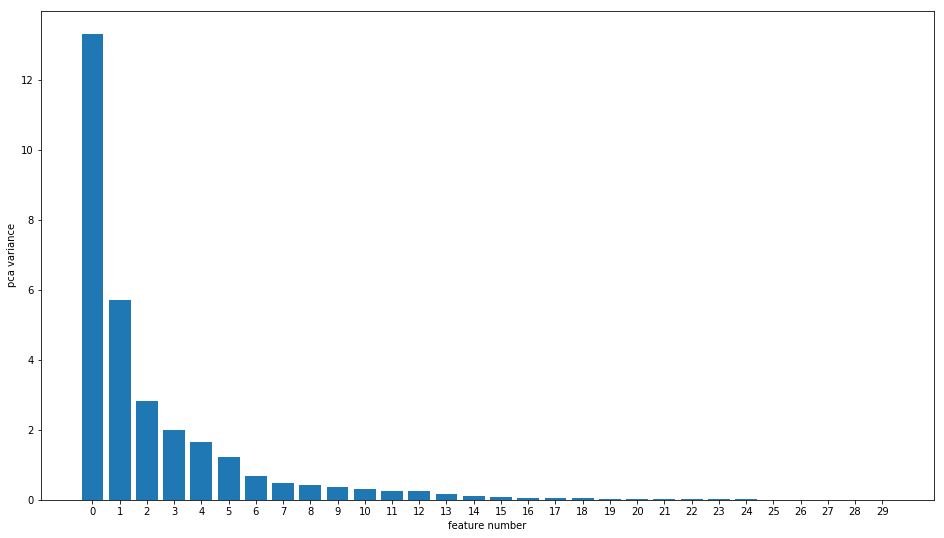

In [152]:
# It's time to reduce the dimension using PCA
from sklearn.decomposition import PCA
# let's initialize the pca object
pca = PCA(svd_solver='full')

# fit the pca to features_std
_ = pca.fit(features_std)
features_pca = pca.transform(features_std)

features_no = range(pca.n_components_)
plt.figure(figsize=(16,9))
plt.bar(features_no, pca.explained_variance_)
plt.xticks(features_no)
plt.ylabel('pca variance')
plt.xlabel('feature number')
plt.show()

We can clearly see that how feature variance are in decreasing order, so we can say that the features with high variance are informative while with the lesss one are noises.
As we can see that the first 6-7 features are proactively contribute most. But before we train our model on a subset of feature we will do with the 30 features, then we will do PCA again with n_components_ = 7/8 to see how it behaves.

It's time for Machine Learning. We will define our performance matrices then we will start train our model.

## Confusion Matrix
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant
* false negative (FN) : Malignant tumour incorrectly identified as benign
Metrics :

- Accuracy : (TP +TN) / (TP + TN + FP +FN)
- Precision : TP / (TP + FP)
- Recall : TP / (TP + FN)

In [153]:
def plot_confusion_matrix(cf_mat, classes, title, cmap=plt.cm.Blues):
    """ Plotting the given confusion matrix with a specific color map based on the classes. 
    
    Param:
    --------
    cf_mat: confusion matrix
    classes: class labels
    title: title for the plot
    cmap: color map
    default color map is Blues
    """
    plt.imshow(cf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    threshold = cf_mat.max() / 2
    
    for i in range(cf_mat.shape[0]):
        for j in range(cf_mat.shape[1]):
            plt.text(j, i, cf_mat[i, j],
                    horizontalalignment = 'center',
                    color = 'white' if cf_mat[i, j] > threshold else 'black')
    plt.ylabel( 'true label' )
    plt.xlabel( 'predicted label' )
    plt.xticks(classes,classes )
    plt.yticks(classes,classes )
    plt.tight_layout()

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def report_confusion_matrix(true_label, pred_label):
    """Prints out all metrics of confusion matrix.
    
    Params:
    -------
    true_label: this is the true target label
    pred_label: this is the predicted label from the classifier
    """
    true_neg, fals_pos, false_neg, true_pos = confusion_matrix(true_label, pred_label).ravel()
    precision = (true_pos) / (true_pos + fals_pos)
    recall = (true_pos) / (true_pos + false_neg)
    print("Accuracy: ", (true_pos + true_neg) / (true_pos+true_neg+fals_pos+false_neg))
    print("Precission/Positive Predicted Value: ", precision)
    print("Recall/Sensitivity/True Positive Rate: ", recall)
    print("F1 Score: ", 2 * ((precision * recall) / (precision + recall)))
    print("\n\nClassification report:\n", classification_report(true_label, pred_label))
    
    # plot precision-recall curve
#     def plot_precision_recall(precision, recall):
#         plt.plot(recall, precision, "b-", linewidth=2)
#         plt.xlabel("Recall", fontsize=16)
#         plt.ylabel("Precision", fontsize=16)
#         plt.axis([0, 1, 0, 1])
    
#     plot_precision_recall(precision, recall)

In [155]:
from sklearn.metrics import roc_curve
def plot_roc(true_label, pred_label):
    """ Plot the roc curve.
     Params:
    -------
    true_label: this is the true target label
    pred_label: this is the predicted label from the classifier
    """
    fpr, tpr, threshold = roc_curve(true_label, pred_label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Roc Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Poitive Rate')
    plt.title('Roc Curve')
    plt.show()

In [156]:
# Learning curve
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, 
                                                            n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt
    

## Dataset for Training & Testing

In [157]:
# filter our data again for a cleaned dataframe 
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# convert categorical target to numerical target
data['diagnosis'] = data['diagnosis'].map({"M":1, "B":0})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [158]:
y_target = data['diagnosis']
X_feature = data.drop(['diagnosis'], axis=1)

# normalization
X_feature = StandardScaler().fit_transform(X_feature)

In [159]:
# split the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42)


## Classification models

### Logistic Regression

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 500, 1000]
}

log_reg_grid = GridSearchCV(log_reg, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("Best parameters after Grid search cross validated", log_reg_grid.best_params_)

Best parameters after Grid search cross validated {'C': 0.1, 'penalty': 'l2'}


In [161]:
# now fit again with the best parameters
log_reg_grid = LogisticRegression(C=log_reg_grid.best_params_['C'],
                            penalty=log_reg_grid.best_params_['penalty']
                            )
log_reg_grid.fit(X_train, y_train)
y_pred = log_reg_grid.predict(X_test)
y_pred_proba = log_reg_grid.predict_proba(X_test)[:,1]

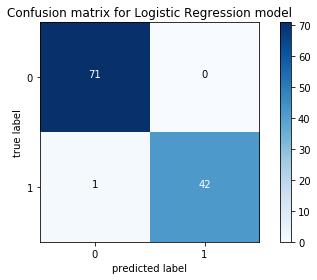

In [162]:
# Result

# confusion matrix
cf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cf_mat, [0,1 ], title='Confusion matrix for Logistic Regression model')
plt.show()

In [163]:
report_confusion_matrix(y_test, y_pred)

Accuracy:  0.9912280701754386
Precission/Positive Predicted Value:  1.0
Recall/Sensitivity/True Positive Rate:  0.9767441860465116
F1 Score:  0.988235294117647


Classification report:
              precision    recall  f1-score   support

          0       0.99      1.00      0.99        71
          1       1.00      0.98      0.99        43

avg / total       0.99      0.99      0.99       114



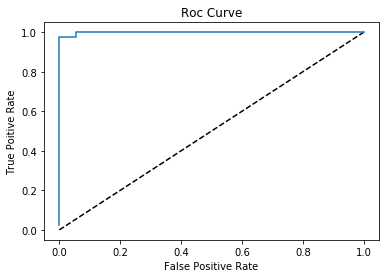

ROC Area under curve score: 0.998689813298395


In [164]:
from sklearn.metrics import roc_auc_score
plot_roc(y_test, y_pred_proba)
print("ROC Area under curve score:", roc_auc_score(y_test, y_pred_proba))

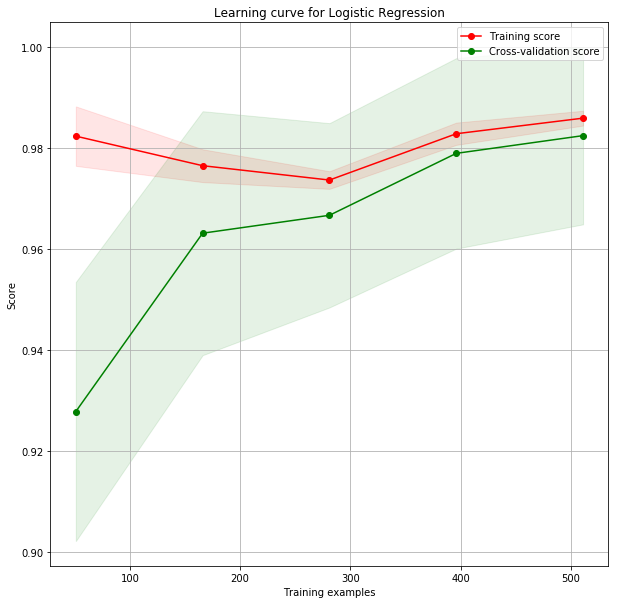

In [165]:
plot_learning_curve(log_reg_grid, "Learning curve for Logistic Regression", X_feature, y_target, cv=10)
plt.show()

### Result performed by Logistic Regression

From the grid search with cross validation of 10 to find the hyperparametrs we got the best value, where C=0.1 and penalty is l2 type. 
We got an accuracy of 99% which is great with a perfect precision score with a lower Recall score. But our recall score is not too low so we did good at it.
Finally ROC curve suggests that the area unde curve is also around 99.8 %
But the question is, is our model biased towards +ve predictions, will it do the same on another test set, and what about other models, and what about our PCA thing.
We will find all these answer very soon, we trained our model with all the features but we already saw in the PCA that first 7-8 feature contribute the most of the data. After trained a couple of model with these full set of feature we will do the same with most important feature set to see how the model differs.

### Support Vector Machine

In [166]:
from sklearn.svm import SVC

svm = SVC()

param_grid_svm = {
    'C': [0.001, 0.1, 1.0, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
print("Best parameter list from the grid search cross validation for SVM:", svm_grid.best_params_)

Best parameter list from the grid search cross validation for SVM: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}


In [167]:
# let's train with the best hyper parameters
svm_grid = SVC(C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'], kernel=svm_grid.best_params_['kernel'])

svm_grid.fit(X_train, y_train)
y_pred = svm_grid.predict(X_test)
y_pred_desc = svm_grid.decision_function(X_test)


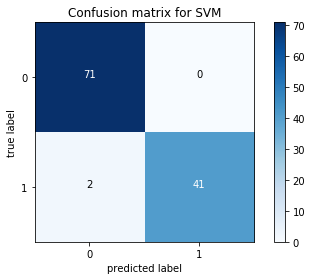

In [168]:
cf_mat_svm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cf_mat_svm, [0, 1], title="Confusion matrix for SVM")
plt.show()

In [169]:
report_confusion_matrix(y_test, y_pred)

Accuracy:  0.9824561403508771
Precission/Positive Predicted Value:  1.0
Recall/Sensitivity/True Positive Rate:  0.9534883720930233
F1 Score:  0.9761904761904763


Classification report:
              precision    recall  f1-score   support

          0       0.97      1.00      0.99        71
          1       1.00      0.95      0.98        43

avg / total       0.98      0.98      0.98       114



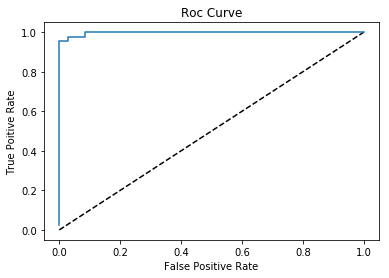

ROC Area under curve for SVM is:  0.99737962659679


In [170]:
from sklearn.metrics import roc_auc_score

plot_roc(y_test, y_pred_desc)
print("ROC Area under curve for SVM is: ", roc_auc_score(y_test, y_pred_desc))

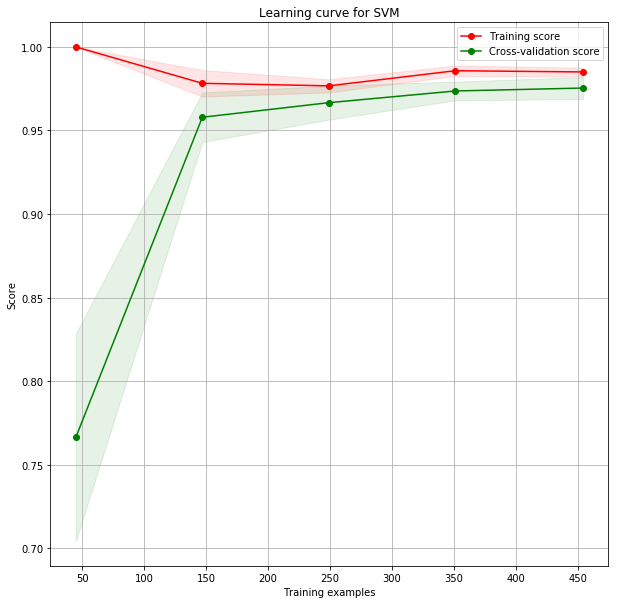

In [171]:
plot_learning_curve(svm_grid, "Learning curve for SVM", X_feature, y_target, cv=5)
plt.show()

### Results for SVM
So the SVM model is bit lower but looks prominent. As we did consider Malignant as positive prediction and Benign as negative prediction we can see that the accuracy for postive prediction using SVM is 98.2% while other metrics are also looks good. 